#  Fast Food Restaurants Across America

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import gmplot
from fuzzywuzzy import process, fuzz

## Getting the Data

In [3]:
data = pd.read_csv('FastFoodRestaurants.csv')

In [4]:
data = data[["address", "city", "country", "latitude", "longitude", "name", "postalCode", "province"]]

In [5]:
data.head()

,address,city,country,latitude,longitude,name,postalCode,province
0,324 Main St,Massena,US,44.92130,-74.89021,McDonald's,13662,NY
1,530 Clinton Ave,Washington Court House,US,39.53255,-83.44526,Wendy's,43160,OH
2,408 Market Square Dr,Maysville,US,38.62736,-83.79141,Frisch's Big Boy,41056,KY
3,6098 State Highway 37,Massena,US,44.95008,-74.84553,McDonald's,13662,NY
4,139 Columbus Rd,Athens,US,39.35155,-82.09728,OMG! Rotisserie,45701,OH


In [ ]:
sorted(data.name.unique())

In [6]:
data['lowername'] = data['name'].apply(lambda x : x.lower().strip())

In [7]:
unique_names = sorted(data.lowername.unique())

## Brands with most restaurant chains

In [8]:
restaurants_counts = data.lowername.value_counts()
restaurants_counts = restaurants_counts[restaurants_counts>250]
restaurants_list = list(restaurants_counts.index)
restaurants_list

["mcdonald's",
 'burger king',
 'taco bell',
 "wendy's",
 "arby's",
 'kfc',
 'subway',
 "domino's pizza"]

## Creating an Independent Function for replacement of the matches in the data.

In [9]:
def replace_name(data, column_name, brand, threshold_ratio = 90):
    query = data[column_name].unique()
    results = process.extract(brand, query, limit=10, scorer=fuzz.token_sort_ratio)
    string_matches = [results[0] for results in results if results[1] >= threshold_ratio]
    rows_with_matches = data[column_name].isin(string_matches) 
    data.loc[rows_with_matches, column_name] = brand
    return data.copy()

## Tokens

In [11]:
similar_name_list = list()
for restuarant in restaurants_list:
    query = data['lowername'].unique()
    results = process.extract(restuarant, query, limit=9, scorer=fuzz.token_sort_ratio)
    similar_name_list.append(results)
similar_name_list

##Check the token_sort_ratio upto the closed value.
#mcdonald's - 58
#burger king - 100
#wendy's - 77

[[("mcdonald's", 100),
  ('mcdonald’s', 100),
  ('mcdonalds', 95),
  ("mcdonald's #25557", 77),
  ("mc donald's", 76),
  ("mcdonald's - walmart", 71),
  ('mc donalds', 70),
  ("flash foods / mcdonald's", 62),
  ('mcdonalds @ old atlanta', 58)],
 [('burger king', 100),
  ('hamburger king', 88),
  ('burger king salou', 79),
  ("burger's landing", 74),
  ('burger time', 73),
  ('in-n-out burger', 69),
  ('fab wings n burgers', 67),
  ('elevation burger', 67),
  ("nick's burgers", 64)],
 [('taco bell', 100),
  ('kfc / taco bell', 82),
  ('del taco', 82),
  ('kfc/taco bell', 82),
  ('taco bueno', 74),
  ('taco local', 74),
  ('taco delight', 67),
  ('taco del mar', 67),
  ('bravo tacos', 60)],
 [("wendy's", 100),
  ('wendys', 77),
  ("p. terry's", 50),
  ('los verdes', 47),
  ('subway', 46),
  ('subway®', 46),
  ('wendy two two eight', 46),
  ('pei wei', 43),
  ('31st avenue gyro', 43)],
 [("arby's", 100),
  ('arbys', 91),
  ("luby's", 67),
  ("arby's antigo", 63),
  ("rally's", 62),
  ('da

In [12]:
tokens = [57, 100, 100, 76, 90, 37, 50, 88]
for token, restuarant in zip(tokens, restaurants_list):
    replace_name(data,'lowername',restuarant, token)

In [13]:
data = replace_name(data,'lowername','kentucky fried chicken', 90)
data.loc[data.lowername.str.startswith('kentucky fried chicken'), 'lowername'] = 'kfc'

In [ ]:
sorted(data.lowername.unique())

In [14]:
data_top = data[data.lowername.isin(restaurants_list)]

In [15]:
data_top.lowername.value_counts()

mcdonald's        2120
burger king       1154
taco bell          873
wendy's            734
arby's             520
kfc                457
subway             413
domino's pizza     359
Name: lowername, dtype: int64

## Heatmaps

### Heatmap of All Restaurants Data

In [16]:
gmap = gmplot.GoogleMapPlotter.from_geocode('US',5)
#Then generate a heatmap using the latitudes and longitudes
gmap.heatmap(data['latitude'], data['longitude'])

In [17]:
gmap.draw('full_list.html')

### Heatmap of Top Restaurants Data

In [19]:
gmap = gmplot.GoogleMapPlotter.from_geocode('US',5)
#Then generate a heatmap using the latitudes and longitudes
gmap.heatmap(data_top['latitude'], data_top['longitude'])

In [20]:
gmap.draw('top_list.html')

#### Heatmap

![](files/Heatmap of Top Restaurants.png)

## Provinces with most number of top restaurants

In [21]:
data_top = data_top[["country", "province", "city", "lowername"]]

In [22]:
%matplotlib inline
data_top_province = data_top.province.value_counts()

In [23]:
data_top_province_list = list(data_top_province[data_top_province>200].index)

In [24]:
data_top_province_top = data_top[data_top.province.isin(data_top_province_list)]

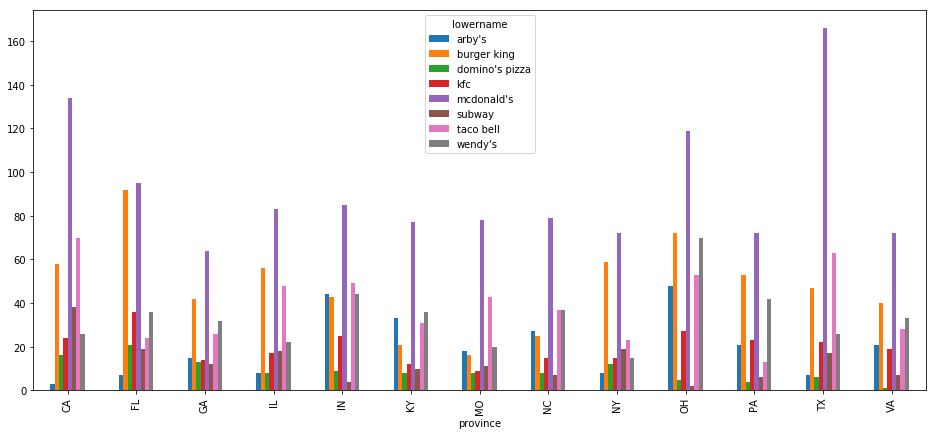

In [25]:
data_top_province_top_group = data_top_province_top.groupby(['province','lowername'])
data_top_province_top_group.size().unstack().plot(kind ='bar', figsize =(16,7))